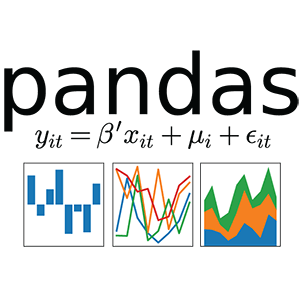

# Outlines
* fillna
* interpolation
* dropna
* replace

In [30]:
import pandas as pd
df = pd.read_csv('D:/Data_Science/My Github/Pandas-tutorial/Document/Handling Missing Data/weather_data.csv')
df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,NaN,9.0,Sunny
2,1/5/2017,28.0,NaN,Snow
3,1/6/2017,NaN,7.0,NaN
4,1/7/2017,32.0,NaN,Rain
5,1/8/2017,NaN,NaN,Sunny
6,1/9/2017,NaN,NaN,NaN
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [32]:
type(df.day[0])

str

In [38]:
# convert day to date column
df = pd.read_csv('D:/Data_Science/My Github/Pandas-tutorial/Document/Handling Missing Data/weather_data.csv',
                parse_dates=['day'])
df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,NaN,NaN,NaN
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


In [35]:
type(df.day[0])

pandas._libs.tslibs.timestamps.Timestamp

In [39]:
# make day as inndex
df.set_index('day',inplace=True)
df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


# fillna


In [40]:
# Replace NaN values with 0 using fillna
new_df = df.fillna(0)
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,0.0,9.0,Sunny
2017-01-05,28.0,0.0,Snow
2017-01-06,0.0,7.0,0
2017-01-07,32.0,0.0,Rain
2017-01-08,0.0,0.0,Sunny
2017-01-09,0.0,0.0,0
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [41]:
# in the case event 0 means nothing
# specify different values for different columns by using dictionary
new_df = df.fillna({
    'temperature':0,
    'windspeed':0,
    'event':'no event'
})
new_df


,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,0.0,9.0,Sunny
2017-01-05,28.0,0.0,Snow
2017-01-06,0.0,7.0,no event
2017-01-07,32.0,0.0,Rain
2017-01-08,0.0,0.0,Sunny
2017-01-09,0.0,0.0,no event
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [42]:
# copying the previous value to the next one
new_df = df.fillna(method='ffill')
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,32.0,9.0,Sunny
2017-01-05,28.0,9.0,Snow
2017-01-06,28.0,7.0,Snow
2017-01-07,32.0,7.0,Rain
2017-01-08,32.0,7.0,Sunny
2017-01-09,32.0,7.0,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [43]:
# copying the next value to the one before
new_df = df.fillna(method='bfill')
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,28.0,9.0,Sunny
2017-01-05,28.0,7.0,Snow
2017-01-06,32.0,7.0,Rain
2017-01-07,32.0,8.0,Rain
2017-01-08,34.0,8.0,Sunny
2017-01-09,34.0,8.0,Cloudy
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [44]:
# previously when we used bfill it was copying vertically now with axis='column' it is copying horizentally
new_df = df.fillna(method='bfill',axis='columns')
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32,6,Rain
2017-01-04,9,9,Sunny
2017-01-05,28,Snow,Snow
2017-01-06,7,7,NaN
2017-01-07,32,Rain,Rain
2017-01-08,Sunny,Sunny,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34,8,Cloudy
2017-01-11,40,12,Sunny


In [46]:
df[4:7]

,temperature,windspeed,event
day,,,
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN


In [47]:
# when we use fillna it copy 32 two times what if we want to copy it only one time
new_df = df.fillna(method='ffill',limit=1)
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,32.0,9.0,Sunny
2017-01-05,28.0,9.0,Snow
2017-01-06,28.0,7.0,Snow
2017-01-07,32.0,7.0,Rain
2017-01-08,32.0,NaN,Sunny
2017-01-09,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


[Click here for more information about fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

# interpolation


In [48]:
# use interpolation for missing data (by default linear interpolation)
new_df = df.interpolate()
new_df


,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-01-04,30.000000,9.00,Sunny
2017-01-05,28.000000,8.00,Snow
2017-01-06,30.000000,7.00,NaN
2017-01-07,32.000000,7.25,Rain
2017-01-08,32.666667,7.50,Sunny
2017-01-09,33.333333,7.75,NaN
2017-01-10,34.000000,8.00,Cloudy
2017-01-11,40.000000,12.00,Sunny


In [49]:
new_df[0:3]

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,30.0,9.0,Sunny
2017-01-05,28.0,8.0,Snow


**30=(32+28)/2 but look at the date, date is not in the middle**

In [51]:
new_df = df.interpolate(method='time')
new_df[0:3]

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,29.0,9.0,Sunny
2017-01-05,28.0,8.0,Snow


**the value change from 28 to 29**

[Click here for information about interpolation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html)

# dropna


In [52]:
# drop all the rows with NaN values using dropna
new_df = df.dropna()
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [53]:
# drop a row if all the values are NaN
new_df = df.dropna(how='all')
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


**2017-01-09 dosn't seen because all its values are NaN**

In [54]:
# If I have at least 1 NaN value then keep the row
new_df = df.dropna(thresh=1)
new_df


,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


**2017-01-09 drops**

In [55]:
new_df = df.dropna(thresh=2)
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-07,32.0,NaN,Rain
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


**2017-01-06 & 2017-01-08 droped**

In [68]:
# 2017-01-02 and 2017-01-03 are missing => How to insert them into DataFrame
# Creating a date range
dt = pd.date_range("01-01-2017","01-11-2017")
idx = pd.DatetimeIndex(dt)
df = df.reindex(idx)
df

,temperature,windspeed,event
2017-01-01,32.0,6.0,Rain
2017-01-02,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy


**You can use one of the fillna methods to fill the NaN values**

# replace

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('D:/Data_Science/My Github/Pandas-tutorial/Document/Handling Missing Data using Replace Function/weather_data.csv')
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,-99999,7,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-99999,7,0
4,1/5/2017,32,-99999,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


In [4]:
# handle missing code using replace function
new_df = df.replace({
    'temperature':-99999,
    'windspeed':-99999,
    'event':'0'
},np.NaN)
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,NaN,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,NaN,7.0,NaN
4,1/5/2017,32.0,NaN,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,NaN


In [6]:
# data has a unit of measure
df = pd.read_csv('D:/Data_Science/My Github/Pandas-tutorial/Document/Handling Missing Data using Replace Function/weather_data_unit.csv')
df

,day,temperature,windspeed,event
0,1/1/2017,32 F,6 mph,Rain
1,1/2/2017,-99999,7 mph,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-88888,7,0
4,1/5/2017,32 C,-88888,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


In [7]:
# replace all the unit of measures with a blank value
# Using regex any character between with a blank value
new_df = df.replace('[A-Za-z]','',regex=True)
new_df


,day,temperature,windspeed,event
0,1/1/2017,32,6,
1,1/2/2017,-99999,7,
2,1/3/2017,28,-99999,
3,1/4/2017,-88888,7,0
4,1/5/2017,32,-88888,
5,1/6/2017,31,2,
6,1/6/2017,34,5,0


**But it erased entire event column because everything in the event is alphabetic**

In [12]:
# you should do it based on column
new_df = df.replace({
    'temperature':'[A-Za-z]',
    'windspeed':'[A-Za-z]',
},'',regex=True)
new_df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,-99999,7,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-88888,7,0
4,1/5/2017,32,-88888,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


In [13]:
# how to replace a list of values with another list of values
df = pd.DataFrame({
    'score':['exceptional','average','good','poor','average','exceptional'],
    'student':['rob','maya','parthiv','tom','julian','erica']
})
df


,score,student
0,exceptional,rob
1,average,maya
2,good,parthiv
3,poor,tom
4,average,julian
5,exceptional,erica


In [14]:
# convert score into numbers
new_df = df.replace(['poor','average','good','exceptional'],[1,2,3,4])
new_df

,score,student
0,4,rob
1,2,maya
2,3,parthiv
3,1,tom
4,2,julian
5,4,erica


|  Date |  Author |   |   |
|---|---|---|---|
| 2021-07-28    |   <font color=blue>**Ehsan Zia**</font>  |  |  |

